In [114]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, csv

plt.style.use('ggplot')
plt.rcdefaults()
font = {'size'   : 40}
plt.rc('font', **font)

#Data files
csv_baseline = 'LoRa-Data/Baseline/Baseline_200m_experiment_phy_2022-05-07_12-46-29.csv'
csv_dryLeaves = 'LoRa-Data/Dry-leaves/Dry_leaves_200m_experiment_phy_2022-05-07_13-22-39.csv'
csv_drySoil = 'LoRa-Data/Dry-soil/Dry_soil_200m_experiment_phy_2022-05-07_13-03-12.csv'
csv_wetSoil = 'LoRa-Data/Wet-soil/Wet-soil_200m_experiment_phy_2022-05-07_14-38-42.csv'
csv_grass = 'LoRa-Data/Grass/Grass_200m_experiment_phy_2022-05-07_12-54-57.csv'

df_baseline = pd.read_csv (csv_baseline)
df_dryLeaves = pd.read_csv (csv_dryLeaves)
df_drySoil = pd.read_csv (csv_drySoil)
df_wetSoil = pd.read_csv (csv_wetSoil)
df_grass = pd.read_csv (csv_grass)

print (df_baseline.head())
# print (df_dryLeaves)
# print (df_drySoil)
# print (df_wetSoil)
# print (df_grass)

            Timestamp  Rssi  Snr  SequenceNumber  SpreadingFactor  TxPower  \
0  132963940136279191   -98    5               0               10       14   
1  132963940136833992   -97    5               1               10       14   
2  132963940137816206   -97    5               2               10       14   
3  132963940138304597   -97    6               3               10       14   
4  132963940139048420   -97    6               4               10       14   

   Bandwidth  
0          2  
1          2  
2          2  
3          2  
4          2  


In [115]:
df_baseline_SF_grouped = df_baseline.groupby(['SpreadingFactor', 'TxPower'])
df_dryLeaves_SF_grouped = df_dryLeaves.groupby(['SpreadingFactor', 'TxPower']) 
df_drySoil_SF_grouped = df_drySoil.groupby(['SpreadingFactor', 'TxPower'])
df_wetSoil_SF_grouped = df_wetSoil.groupby(['SpreadingFactor', 'TxPower'])
df_grass_SF_grouped = df_grass.groupby(['SpreadingFactor', 'TxPower'])

# Sanity check that we have SF 8-12 
# Sanity check that we have TX Powers 8,10,12,14 dBm
# print(df_baseline_SF_grouped.groups.keys())
# print(df_dryLeaves_SF_grouped.groups.keys())
# print(df_drySoil_SF_grouped.groups.keys())
# print(df_wetSoil_SF_grouped.groups.keys())
# print(df_grass_SF_grouped.groups.keys())

df_terrain_list = [df_baseline_SF_grouped, df_dryLeaves_SF_grouped, df_drySoil_SF_grouped, df_wetSoil_SF_grouped, df_grass_SF_grouped]
SF_list = [8,9,10,11,12]
Tx_list = [8, 10, 12, 14]

In [116]:
RSSI_Terrain = []
RSSI_Terrain_errorbars = []
RSSI_SF = []
RSSI_errorbars_SF = []
PRR_Terrain = []
PRR_SF = []
for df_terrain in df_terrain_list:
    RSSI_SF = []
    RSSI_errorbars_SF = []
    PRR_SF = []
    for SF in SF_list:
        RSSI_Tx = []
        RSSI_errorbars_Tx = []
        PRR_Tx = []
        for Tx in Tx_list:
            RSSI_Tx.append(df_terrain.get_group((SF,Tx))['Rssi'].mean())
            RSSI_errorbars_Tx.append(df_terrain.get_group((SF,Tx))['Rssi'].std())
            # print('SF:', SF , 'Tx Power:' , Tx , df_baseline_SF_grouped.get_group((SF,Tx))['Rssi'].mean())
            PRR_Tx.append(df_terrain.get_group((SF,Tx))['SequenceNumber'].count())
        # Save all Tx to specific SF
        RSSI_SF.append(RSSI_Tx)
        RSSI_errorbars_SF.append(RSSI_errorbars_Tx)
        if SF>10: 
            #Used 50 packets
            PRR_SF.append([PRR/50 for PRR in PRR_Tx])
        else:
            #Used 100 packets
            PRR_SF.append([PRR/100 for PRR in PRR_Tx])
    # Save all SF to specific Terrain
    RSSI_Terrain.append(RSSI_SF)
    RSSI_Terrain_errorbars.append(RSSI_errorbars_SF)
    PRR_Terrain.append(PRR_SF)

In [135]:
RSSI_Terrain

[[[-100.07, -98.45, -97.49, -94.82],
  [-102.39, -101.32, -100.21, -98.29],
  [-101.35, -99.83, -98.97, -97.07],
  [-101.74, -97.62, -97.82, -97.48],
  [-101.32, -98.66, -97.62, -95.16]],
 [[-99.11, -98.32, -97.87, -96.61],
  [-102.72727272727273, -100.89, -97.27, -94.04],
  [-97.85, -100.35353535353535, -99.31, -100.37373737373737],
  [-102.04, -98.58, -100.08, -99.86],
  [-99.38, -99.8, -97.84, -93.78]],
 [[-97.14, -94.58, -91.29, -90.4],
  [-97.51, -94.6, -94.19, -90.55],
  [-96.12, -92.5, -91.27, -89.95],
  [-96.56, -93.28, -90.14, -88.34],
  [-94.64, -91.96, -91.4, -88.46]],
 [[-103.59, -103.18181818181819, -100.36363636363636, -100.26],
  [-103.23, -102.66, -100.02, -99.63],
  [-103.77, -101.03, -99.39, -100.76],
  [-103.74, -103.4, -101.72, -100.76],
  [-102.58, -102.44, -100.46, -98.26]],
 [[-102.78, -100.9, -98.37, -96.79],
  [-102.86, -101.75, -102.22, -99.16],
  [-100.61, -101.94, -99.61, -97.63],
  [-101.84, -100.8, -99.04, -96.74],
  [-100.62, -99.5, -99.24, -97.12]]]

In [137]:
list(zip(*RSSI_Terrain[0]))[0]

(-100.07, -102.39, -101.35, -101.74, -101.32)

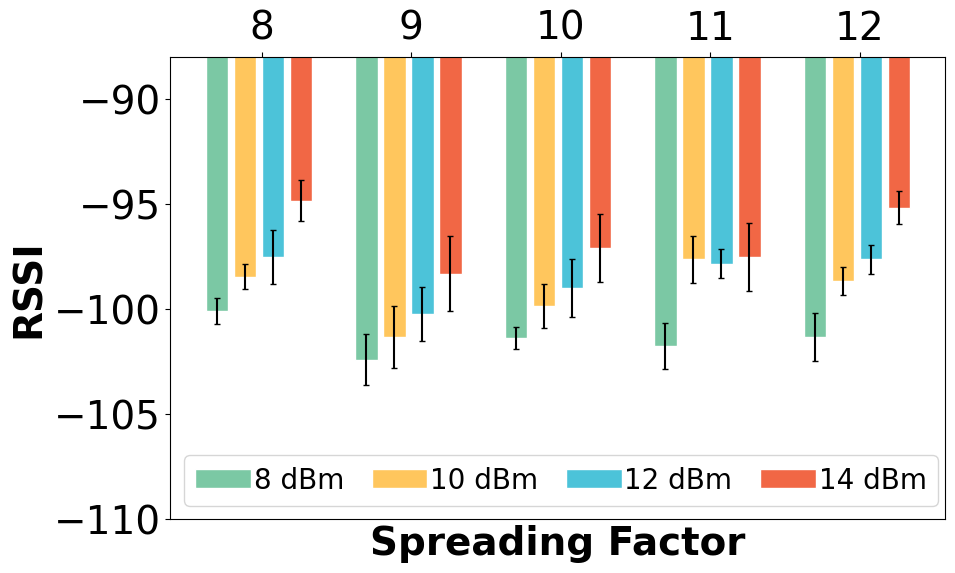

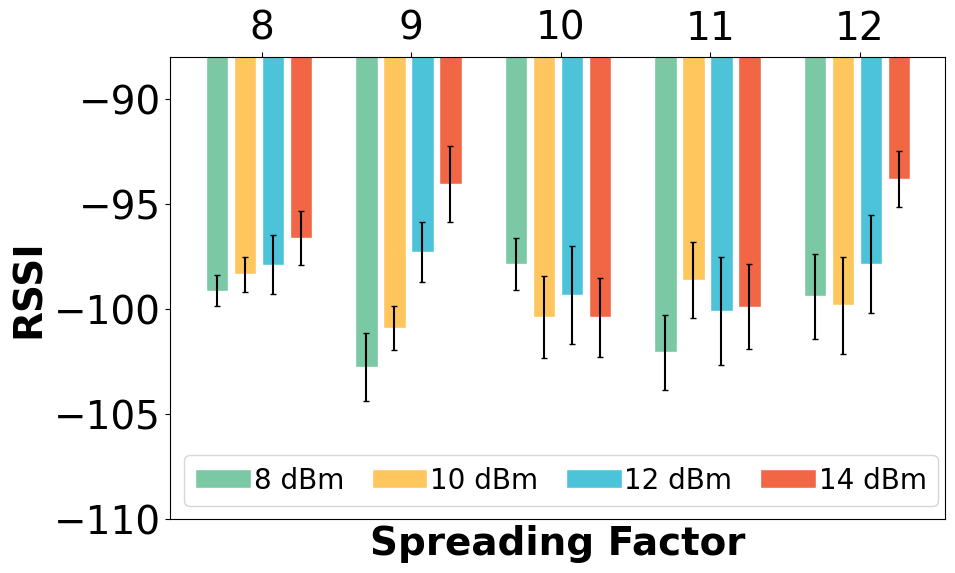

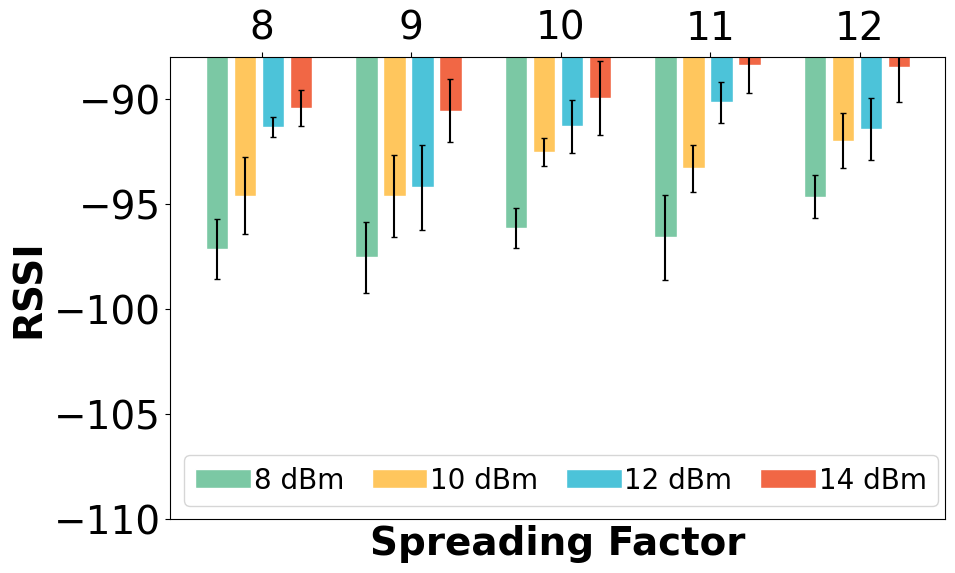

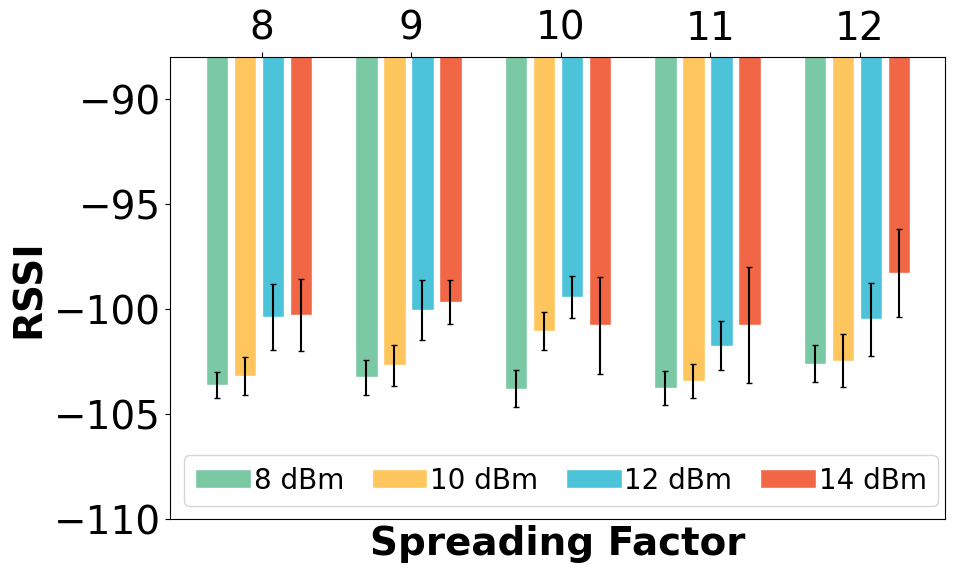

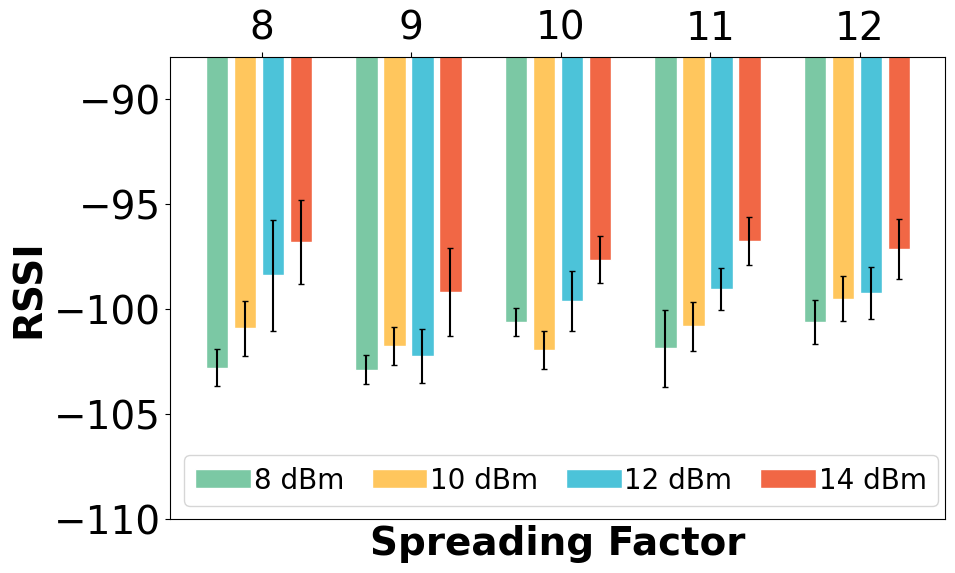

In [211]:
terrain_list_name = ['baseline', 'dryLeaves', 'drySoil', 'wetSoil', 'grass']
for terrain_index in [0,1,2,3,4]:
    # set width of bar
    barWidth = 0.1
    font = {'size'   : 28}
    plt.rc('font', **font)  

    # Set position of bar on X axis
    Tx8 = np.arange(len(SF_list))
    Tx8 = Tx8/1.5
    Tx10 = [x + barWidth + 0.025 for x in Tx8]
    Tx12 = [x + barWidth + 0.025 for x in Tx10]
    Tx14 = [x + barWidth + 0.025 for x in Tx12]

    fig = plt.figure(figsize=(10,6))
    
    # Make the plot
    plt.bar(Tx8, list(zip(*RSSI_Terrain[terrain_index]))[0], yerr = list(zip(*RSSI_Terrain_errorbars[terrain_index]))[0], width=barWidth, color="#7BC8A4", edgecolor='white', label='8 dBm',capsize=2)
    plt.bar(Tx10, list(zip(*RSSI_Terrain[terrain_index]))[1], yerr =  list(zip(*RSSI_Terrain_errorbars[terrain_index]))[1], width=barWidth, color="#FFC65D", edgecolor='white', label='10 dBm', capsize=2)
    plt.bar(Tx12,list(zip(*RSSI_Terrain[terrain_index]))[2], yerr = list(zip(*RSSI_Terrain_errorbars[terrain_index]))[2], width=barWidth, color="#4CC3D9", edgecolor='white', label='12 dBm', capsize=2)
    plt.bar(Tx14,list(zip(*RSSI_Terrain[terrain_index]))[3], yerr =  list(zip(*RSSI_Terrain_errorbars[terrain_index]))[3], width=barWidth, color="#F16745", edgecolor='white', label='14 dBm', capsize=2)

    # Add xticks on the middle of the group bars
    plt.ylabel('RSSI', fontweight='bold')
    plt.xlabel('Spreading Factor', fontweight='bold')
    plt.xticks([r + 2*barWidth for r in Tx8], SF_list)
    ax = plt.gca()
    ax.xaxis.tick_top()
    plt.ylim(-110,-88)
    # Create legend & Show graphic
    # plt.legend(loc='upper right')
    plt.legend(loc='lower left', prop={'size': 20}, columnspacing = 1, handletextpad = 0.1, ncol=4)
    # plt.show()
    file_name = 'lora-RSSI-' + terrain_list_name[terrain_index] + '.png'
    plt.savefig(file_name, dpi=100, bbox_inches='tight')
    # plt.close('all')
